In [2]:
import numpy as np
from matplotlib import pyplot as plt

In [3]:
#each point is length, width, type(0, 1)

data = [[3, 1.5,  1],
        [2, 1,    0],
        [4, 1.5,  1],
        [3, 1,    0],
        [3.5, .5, 1],
        [2,  .5,  0],
        [5.5, 1,  1],
        [1,  1,   0]]

mystery = [4.5, 1]

In [4]:
def sigmoid(x):
    return 1/(1 + np.exp(-x))

def sigmoid_deri(x):
    return sigmoid(x) * (1 - sigmoid(x))

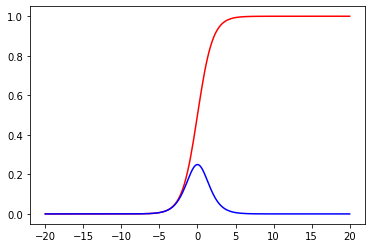

In [5]:
T = np.linspace(-20, 20, 200)
plt.plot(T, sigmoid(T), c='r')
plt.plot(T, sigmoid_deri(T), c='b')

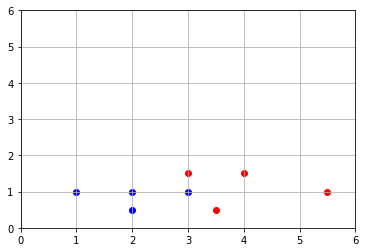

In [6]:
#scatter data
plt.axis([0, 6, 0, 6])
plt.grid()
for i in range(len(data)):
    point = data[i]
    color = "r"
    if point[2] == 0:
        color = "b"
    plt.scatter(point[0], point[1], c=color)

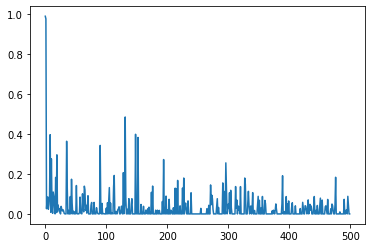

In [8]:
#training loop

learning_rate = 0.2
costs = []    # keep track of the cost

w1 = np.random.randn()
w2 = np.random.randn()
b = np.random.randn()

for i in range(50000):
    ri = np.random.randint(len(data))
    point = data[ri]
    z = point[0] * w1 + point[1] * w2 +b
    pred = sigmoid(z)
    
    
    target = point[2]
    cost = np.square(pred - target)
    
   
    
    dcost_pred = 2 * (pred - target)
    dpred_dz = sigmoid_deri(z)
    
    dz_dw1 = point[0]
    dz_dw2 = point[1]
    dz_db = 1
    
    dcost_dz = dcost_pred * dpred_dz
    dcost_dw1 = dcost_dz * dz_dw1
    dcost_dw2 = dcost_dz * dz_dw2
    dcost_db = dcost_dz * dz_db
        
    w1 = w1 - learning_rate * dcost_dw1    
    w2 = w2 - learning_rate * dcost_dw2 
    b = b - learning_rate * dcost_db 
    
    if i % 100 == 0:
        cost_sum = 0
        for j in range(len(data)):
            point = data[ri]
            
            z = point[0] * w1 + point[1] * w2 +b
            pred = sigmoid(z)
            
            target = point[2]
            cost_sum += np.square(pred - target)
            
        costs.append(cost_sum/len(data))
        
    
plt.plot(costs)

In [14]:
print(costs, w1, w2, b)

[0.9911193155934013, 0.9779199228374563, 0.026109556689420062, 0.07493559708763954, 0.08515148284072639, 0.02311679127273317, 0.04664353949595502, 0.0917017712119853, 0.3973111457520908, 0.008383683598519319, 0.2760886510332343, 0.04388268564942848, 0.0030676227678938057, 0.10969875355791679, 0.08774182243248618, 0.032488311336360244, 4.894736095738315e-05, 0.18320771510291503, 0.006618612533008347, 0.2962347087042802, 0.009682948095866081, 0.044669582217449974, 0.022324951380271088, 0.02553735514520628, 0.008050839563527411, 2.9415266016739396e-06, 0.037857832980534946, 0.02368485774243381, 0.014797049742821065, 0.02109299197091374, 0.015344476709479585, 0.0025470041487102584, 0.0003926308352180763, 2.2849196259188772e-05, 1.194290641581888e-05, 0.36443627366162346, 0.13202711671816958, 2.2977065022310663e-05, 0.017802934618397163, 8.829691717388119e-05, 0.0001221061937096758, 0.08694213754504965, 1.1401479632203837e-06, 0.17388572545585934, 0.0549530943706023, 0.00014902529139906092,

In [50]:
#visualise model predictions

for i in range(len(data)):
    point = data[i]
    print(point)
    z = point[0] * w1 + point[1] * w2 +b
    pred = sigmoid(z)
    print("pred: {}".format(pred))

[3, 1.5, 1]
pred: 0.8587026315089533
[2, 1, 0]
pred: 0.0009516911276591458
[4, 1.5, 1]
pred: 0.9998683410811217
[3, 1, 0]
pred: 0.543462624751438
[3.5, 0.5, 1]
pred: 0.891806591476102
[2, 0.5, 0]
pred: 0.00018655767781134797
[5.5, 1, 1]
pred: 0.9999999847823666
[1, 1, 0]
pred: 7.622990660135192e-07


In [52]:
z = mystery[0] * w1 + mystery[1] * w2 +b
pred = sigmoid(z)
pred

0.9999809838463527